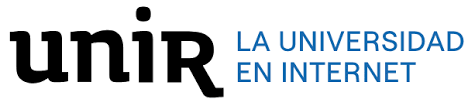

<hr style="border: none; height: 10px; background-color: blue; opacity:60%;">

<h2 style="text-align: center; font-weight: bold;">Asignatura: Percepción Computacional</h2>


<h2 style="text-align: center; font-weight: bold;">Actividad grupal: Evaluación de la segmentación</h2>

<h2 style="text-align: center; font-weight: bold;">Equipo 1073-H:</h2>

<h3 style="text-align: center;">Diego Alexis Galván Sandoval</h3>
<h3 style="text-align: center;">Marcos Miguel Lopéz Hernández</h3>
<h3 style="text-align: center;">Eduardo Alberto Domínguez Fontes</h3>
<h3 style="text-align: center;">Dennis Martin Herrera Herrera</h3>


<hr style="border: none; height: 10px; background-color: blue; opacity:60%;">


## Objetivos

El objetivo de este trabajo es aprender a construir y evaluar el rendimiento de uno o más segmentadores. Esta actividad permitirá consolidar los conceptos sobre segmentación de imágenes aprendidos.


In [10]:
from scipy.io import loadmat
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import random
import scipy.io as sio
from skimage.segmentation import slic
from skimage.color import label2rgb
from skimage.filters import threshold_otsu, threshold_niblack, threshold_sauvola

# Métodos de segmentación

## SLIC-Simple-Linear-Iterative-Clustering

Simple Linear Iterative Clustering, es un algoritmo diseñado para segmentar imágenes en superpíxeles, que son regiones compactas de píxeles que comparten características similares. A diferencia de otros métodos de segmentación, SLIC es conocido por ser eficiente y fácil de implementar.

El algoritmo funciona agrupando píxeles cercanos en color y espacio en grupos, utilizando una variante del algoritmo de k-means. Inicia dividiendo la imagen en una cuadrícula regular y luego ajusta iterativamente los bordes de estos grupos para asegurar que los píxeles dentro de cada superpíxel sean similares entre sí, tanto en términos de color como de proximidad espacial.

Una de las ventajas clave de SLIC es que permite controlar el tamaño y la forma de los superpíxeles a través de un parámetro que ajusta la importancia relativa del color versus la distancia espacial. Esto hace que SLIC sea flexible para diferentes tipos de imágenes y aplicaciones, desde la segmentación de objetos hasta la mejora de la compresión de imágenes.

Probamos este algoritmo acontinuación

In [11]:
img = cv.imread('mexico3.png')
mexgt = cv.imread('mexico3_35.png',cv.IMREAD_GRAYSCALE)

In [12]:
segments = slic(img, n_segments=1000, compactness=1000,channel_axis=-1,max_num_iter=100,sigma=1)
image_seg = label2rgb(segments, img, kind = 'avg')

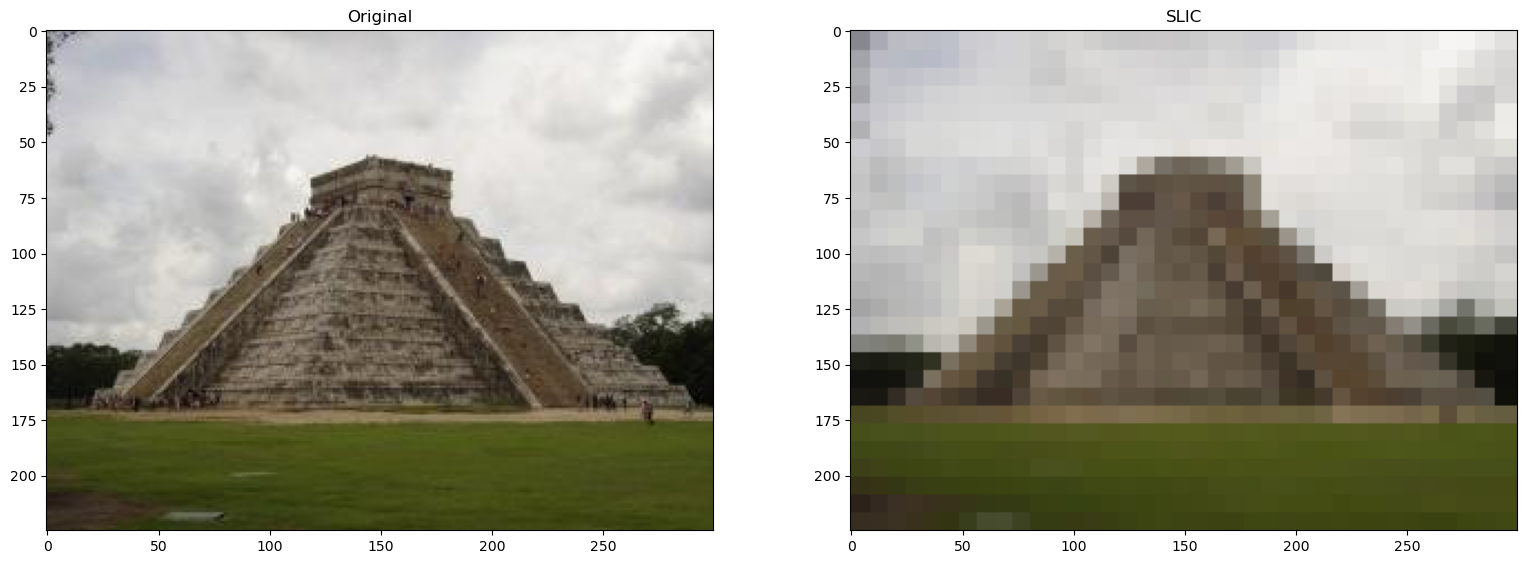

In [13]:
fig, ax = plt.subplots(1,2,figsize=(20,20))
plt.subplots_adjust(left=1,bottom=1,right=1.8,top=1.25, wspace=0.01, hspace=0.01)
ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(image_seg,cv.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[1].set_title('SLIC')
plt.show()

## Método Niblack

El método Niblack es una técnica de umbralización adaptativa utilizada en el procesamiento de imágenes, especialmente útil en casos donde hay variaciones de iluminación dentro de la misma imagen. A diferencia de los métodos de umbralización global, que aplican un único valor de umbral a toda la imagen, Niblack calcula un umbral local para cada píxel basado en la media y la desviación estándar de los píxeles en su vecindad inmediata.

Desarrollado por W. Niblack en 1986, este método se utiliza comúnmente en la binarización de documentos, especialmente aquellos que son antiguos o están deteriorados, donde la calidad de la imagen puede variar significativamente de una región a otra. La idea principal detrás de Niblack es ajustar el umbral en función de las características locales de la imagen, permitiendo una separación más efectiva entre el fondo y el primer plano en áreas con diferentes condiciones de iluminación. Esto lo convierte en una herramienta poderosa en aplicaciones donde los métodos tradicionales fallan al lidiar con contrastes no uniformes.

In [66]:
mex = cv.imread('letter2_original.png',cv.IMREAD_GRAYSCALE)
mexgt = cv.imread('letters2_groundt.png',cv.IMREAD_GRAYSCALE)
mexgt = mexgt[:554,:660]
mexgt = (mexgt == 255).astype(np.uint8)

In [69]:
thresh_niblack = threshold_niblack(mex, window_size=39, k=.8)
mex_niblack = (mex > thresh_niblack)*1

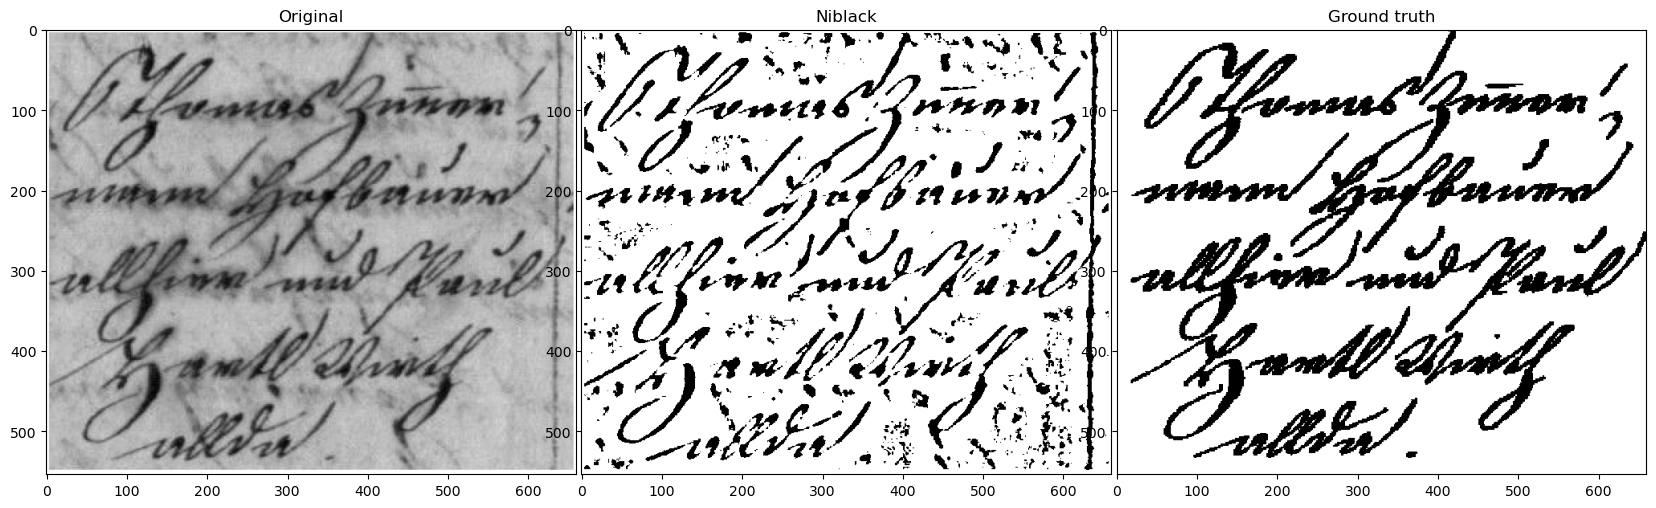

In [70]:
fig, ax = plt.subplots(1,3,figsize=(20,20))
plt.subplots_adjust(left=1,bottom=1,right=1.8,top=1.25, wspace=0.01, hspace=0.01)
ax[0].imshow(cv.cvtColor(mex,cv.COLOR_BGR2RGB))
ax[1].imshow(mex_niblack,cmap=plt.cm.gray)
ax[2].imshow(mexgt,cmap=plt.cm.gray)

ax[0].set_title('Original')
ax[1].set_title('Niblack')
ax[2].set_title('Ground truth')
plt.show()

### Evaluación por el Índice de Similaridad de Dice (DSI)

$$ DSI =  2\frac{X \cap Y }{|X|+|Y|}$$

In [73]:
def dsi(image1, image2):
    image1 = image1 > 0
    image2 = image2 > 0
    intersection = np.sum(image1 & image2)
    sum_images = np.sum(image1) + np.sum(image2)
    if sum_images == 0:
        return 1.0  
    return 2.0 * intersection / sum_images

dsi = dice_similarity_coefficient(mex, mexgt)
dsi2 = dice_similarity_coefficient(mex, mex_niblack)
print(f"Dice Similarity Index: {dsi2:.4f}")

Dice Similarity Index: 0.9133


## Referencias
1. Russell, B. C., Torralba, A., Murphy, K. P., & Freeman, W. T. (2008). LabelMe: A database and web-based tool for image annotation. International Journal of Computer Vision, 77(1-3), 157-173.
2. Yang, Z., Zuo, S., Zhou, Y., He, J., & Shi, J. (2024). A review of document binarization: Main techniques, new challenges, and trends. *Electronics, 13*(7), 1394. https://doi.org/10.3390/electronics13071394
3. Xing, J., Yang, P., & Qingge, L. (2020). Automatic thresholding using modified valley emphasis. *IET Image Processing, 14*. https://doi.org/10.1049/iet-ipr.2019.0176